Installing the required packages:

In [48]:
!pip install astropy

In [49]:
!pip install sep

Importing the required modules

In [50]:
import numpy as np
import sep

from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

Loading the fits image into a 2d numpy array using .open and .data

Plotting the numpy array using imshow

Saving the loaded image as a .png

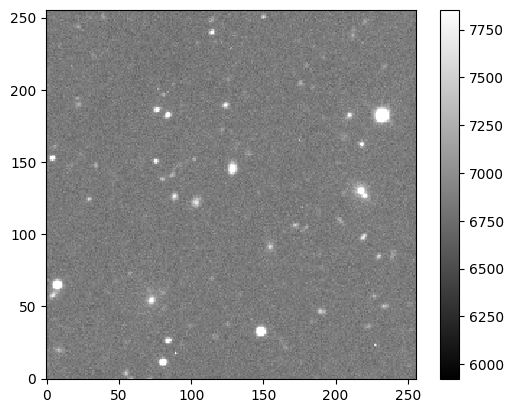

In [51]:
# Load the FITS file
fits_file = '/content/image.fits'  # Replace with your file path
hdul = fits.open(fits_file)
data = hdul[0].data

# show the image
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar()
plt.savefig('image.png');

Getting the background of the plotted image using the using the sep module and saving it as a .png

Printing the global mean and noise of the plotted image

6852.04931640625
65.46174621582031


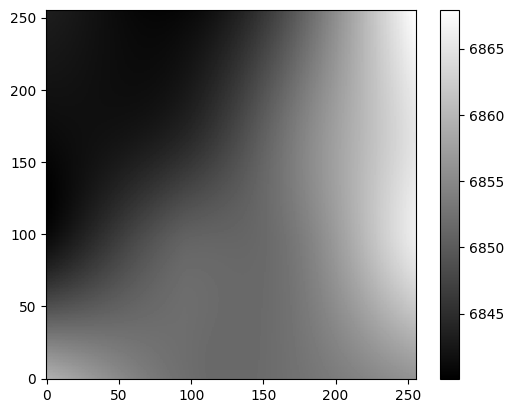

In [52]:
# measure a spatially varying background on the image
bkg = sep.Background(data)

mask = np.zeros_like(data, dtype=bool)
bkg = sep.Background(data, mask=mask, bw=64, bh=64, fw=3, fh=3)

# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()
# bkg_image = np.array(bkg) # equivalent to above

# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('bckground.png');


Evaluating the background noise and plotting it onto another .png that is also saved

Subtracting the background from the main data

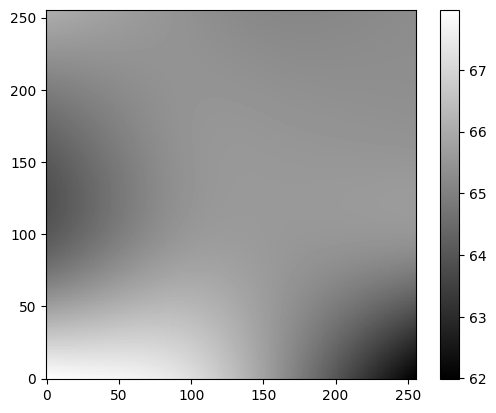

In [53]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

# show the background noise
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar()
plt.savefig('noise.png');

# subtract the background
data_sub = data - bkg

Object Detection by plotting a background subtracted img

Plotting an ellipse for each detected object

Saving the img as a .png

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

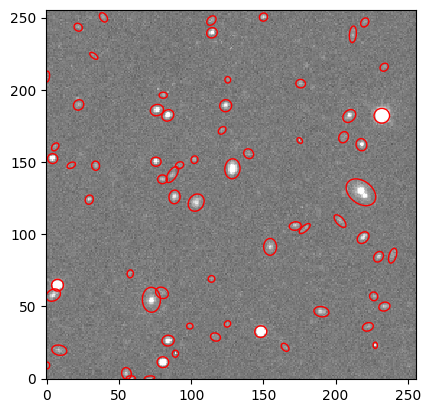

In [54]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

# how many objects were detected
len(objects)

# plot background-subtracted image
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('detected.png')
# available fields
objects.dtype.names

Aperture photometry and printing the flux of all the objects found

In [55]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.159297 +/- 291.027802
object 1: flux = 3092.220430 +/- 291.592204
object 2: flux = 5949.868379 +/- 356.562003
object 3: flux = 1851.426582 +/- 295.028816
object 4: flux = 72736.386914 +/- 440.172206
object 5: flux = 3860.756152 +/- 352.163162
object 6: flux = 6418.913789 +/- 357.458973
object 7: flux = 2210.707656 +/- 350.791223
object 8: flux = 2741.607227 +/- 352.277746
object 9: flux = 20916.875566 +/- 376.966138
